In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

## Load data

In [43]:
data = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')

In [44]:
data = data.iloc[:, :5]
print(data)
data.isna().sum()

           MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT
0      Alkoholunfälle               insgesamt  2022  202201    NaN
1      Alkoholunfälle               insgesamt  2022  202202    NaN
2      Alkoholunfälle               insgesamt  2022  202203    NaN
3      Alkoholunfälle               insgesamt  2022  202204    NaN
4      Alkoholunfälle               insgesamt  2022  202205    NaN
...               ...                     ...   ...     ...    ...
2081  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0
2082  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0
2083  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0
2084  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0
2085  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0

[2086 rows x 5 columns]


MONATSZAHL      0
AUSPRAEGUNG     0
JAHR            0
MONAT           0
WERT           84
dtype: int64

## Data visualization and preprocessing

### Get data from 2021, and 2000--2020

In [45]:
data = data.dropna() # Remove all NaN data (remove all data in 2022)

data_sum = data[data['MONAT'] == 'Summe']
data = data[data['MONAT'] != 'Summe']

data_21 = data[data['JAHR'] == 2021]
data = data[data['JAHR'] != 2021]

data_ins = data_sum[data_sum['AUSPRAEGUNG'] == 'insgesamt']

print('\n---------- data_al_i ----------\n')
print(data)
print('\n---------- data_21_al_i ----------\n')
print(data_21)


---------- data_al_i ----------

           MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT
26     Alkoholunfälle               insgesamt  2020  202001   28.0
27     Alkoholunfälle               insgesamt  2020  202002   40.0
28     Alkoholunfälle               insgesamt  2020  202003   27.0
29     Alkoholunfälle               insgesamt  2020  202004   26.0
30     Alkoholunfälle               insgesamt  2020  202005   40.0
...               ...                     ...   ...     ...    ...
2081  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0
2082  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0
2083  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0
2084  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0
2085  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0

[1764 rows x 5 columns]

---------- data_21_al_i ----------

           MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT
13     Alkoholunfälle            

                     WERT                              
MONATSZAHL Alkoholunfälle Fluchtunfälle Verkehrsunfälle
JAHR                                                   
2000               1310.0       12125.0         57224.0
2001               1239.0       12083.0         59113.0
2002               1182.0       11279.0         53254.0
2003               1049.0       10173.0         50052.0
2004                963.0       11089.0         51497.0
2005                881.0       11562.0         52599.0
2006                885.0        9134.0         48888.0
2007                841.0        9603.0         48061.0
2008                722.0        9834.0         47151.0
2009                643.0        9726.0         46391.0
2010                603.0       10355.0         46946.0
2011                595.0       10756.0         52857.0
2012                663.0       11685.0         56620.0
2013                530.0       11707.0         58896.0
2014                549.0       11403.0         

Text(0.5, 0.98, 'The number of accidents per category')

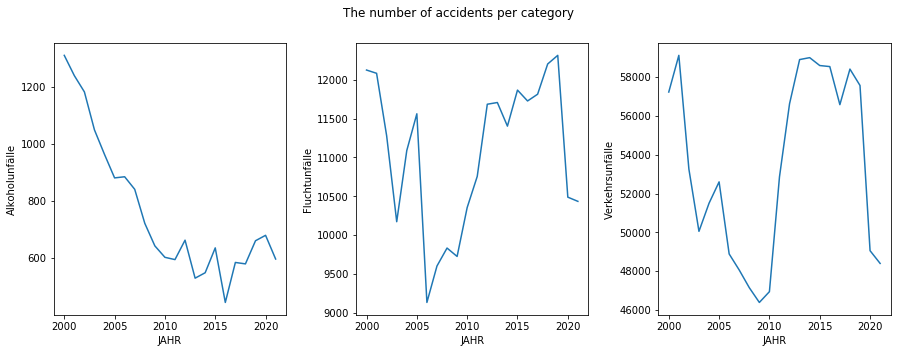

In [46]:
data_sum_plt = data_sum.groupby(['JAHR', 'MONATSZAHL'])
data_sum_plt = data_sum_plt.sum()
data_sum_plt = data_sum_plt.unstack(level = 1)
print(data_sum_plt)
data_sum_plt.columns = ['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'] 

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(data_sum_plt):
    sns.lineplot(ax=axs[i], data=data_sum_plt[col])
plt.subplots_adjust(wspace = 0.3, hspace=0)
fig.suptitle('The number of accidents per category')

Text(0.5, 1.0, 'Number of accidents 2000 -- 2020')

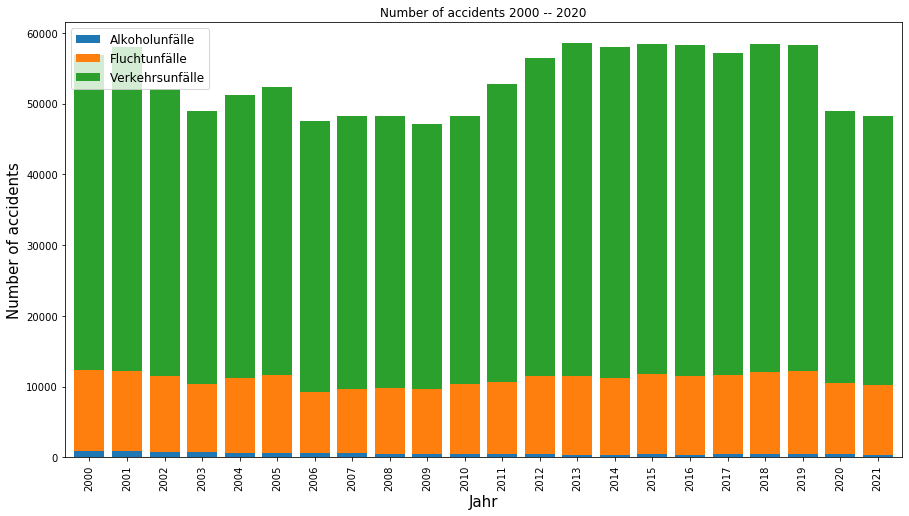

In [47]:
acc_ins = data_ins.pivot(index = 'JAHR', columns = 'MONATSZAHL', values = 'WERT')
acc_ins.loc[2000:].plot.bar(width = 0.8, stacked = True, figsize = (15, 8))

plt.xlabel('Jahr', fontsize = 15)
plt.ylabel('Number of accidents', fontsize = 15)
plt.legend(loc = 2, prop = {'size' : 12})
plt.title('Number of accidents 2000 -- 2020')


In [48]:
data_al = data[data['MONATSZAHL'] == 'Alkoholunfälle'].sort_values('JAHR')
data_al_i = data_al[data_al['AUSPRAEGUNG'] == 'insgesamt']
data_21_al = data_21[data_21['MONATSZAHL'] == 'Alkoholunfälle']
data_21_al_i = data_21_al[data_21_al['AUSPRAEGUNG'] == 'insgesamt']

In [49]:
print('\n---------- data_al_i ----------\n')
print(data_al_i)
print('\n---------- data_21_al_i ----------\n')
print(data_21_al_i)


---------- data_al_i ----------

         MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT
297  Alkoholunfälle   insgesamt  2000  200012  85.0
288  Alkoholunfälle   insgesamt  2000  200003  73.0
289  Alkoholunfälle   insgesamt  2000  200004  78.0
290  Alkoholunfälle   insgesamt  2000  200005  96.0
291  Alkoholunfälle   insgesamt  2000  200006  57.0
..              ...         ...   ...     ...   ...
36   Alkoholunfälle   insgesamt  2020  202011  23.0
27   Alkoholunfälle   insgesamt  2020  202002  40.0
32   Alkoholunfälle   insgesamt  2020  202007  58.0
37   Alkoholunfälle   insgesamt  2020  202012  13.0
26   Alkoholunfälle   insgesamt  2020  202001  28.0

[252 rows x 5 columns]

---------- data_21_al_i ----------

        MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT
13  Alkoholunfälle   insgesamt  2021  202101  16.0
14  Alkoholunfälle   insgesamt  2021  202102  14.0
15  Alkoholunfälle   insgesamt  2021  202103  24.0
16  Alkoholunfälle   insgesamt  2021  202104  16.0
17  Alkoholunfälle   insge

In [50]:
data_al_i = data_al_i.drop(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR'], axis=1)
data_21_al_i= data_21_al_i.drop(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR'], axis=1)
data_21_al_i

,MONAT,WERT
13,202101,16.0
14,202102,14.0
15,202103,24.0
16,202104,16.0
17,202105,24.0
18,202106,48.0
19,202107,44.0
20,202108,46.0
21,202109,54.0
22,202110,43.0


### LinearRegression

In [51]:
features = ['MONAT']

X_train, X_test, Y_train, Y_test = train_test_split(data_al_i[features], data_al_i['WERT'], test_size = 0.2, random_state=0, shuffle=True)
model = LinearRegression()
print(len(X_train))
print(len(Y_train))

201
201


In [52]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
MSE = metrics.mean_squared_error(Y_test, pred)
print('MSE on val set: {}'.format(MSE))
print(pred)

joblib.dump(model, './dps_model.pkl')

MSE on val set: 150.67026476429086
[37.81434783 52.06019926 35.71877704 47.80860852 39.82931975 31.70898294
 45.79363661 27.69918883 53.95427286 41.92489054 39.8897689  25.70436664
 45.81378633 33.8851526  39.95021806 51.9997501  29.81490934 35.79937592
 37.95539587 47.82875824 33.86500288 58.08496528 25.64391748 41.86444138
 45.83393605 23.85059248 63.96868327 55.94909505 31.85003097 57.92376753
 23.669245   43.89956301 45.85408577 33.74410457 35.7792262  39.74872087
 33.84485317 64.02913242 61.93356163 33.92545204 43.87941329 62.13505883
 29.6738613  35.8799748  49.92432903 43.96001217 25.86556439 58.06481556
 53.97442258 33.70380513 53.87367398]


['./dps_model.pkl']

In [39]:
X_test = data_21_al_i[features]
Y_test = data_21_al_i['WERT']
pred = model.predict(X_test)
MSE = metrics.mean_squared_error(Y_test, pred)
print('Prediction on test-set (2021) MSE is {}'.format(MSE))
print(pred)

Prediction on test-set (2021) MSE is 295.4813888303717
[21.83562056 21.81547084 21.79532112 21.77517141 21.75502169 21.73487197
 21.71472225 21.69457253 21.67442281 21.65427309 21.63412337 21.61397365]


In [41]:
d = [[202101]]
model.predict(d)

array([21.83562056])